# Intro to Python

## Introductory Example (White Noise Process)
 
Lets break down a simple program to see how it works - then we can discuss each component of the program to build our knowledge of Python

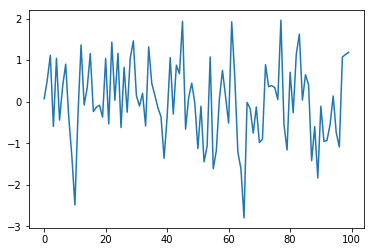

In [23]:
from random import normalvariate
import matplotlib.pyplot as plt

ts_length = 100
epsilon_values = []   # An empty list
for i in range(ts_length):
    e = normalvariate(0, 1)   # Draw epsilon from normal distribution
    epsilon_values.append(e)  # Add random draw to list
plt.plot(epsilon_values)
plt.show()

# Components of this Program

1. Import Statements
1. Variable Assignments
1. Looping
1. Plotting

## [Lines 1 - 2] Import statements

* The base Python package contains minimal functionality
* To do something more interesting, we'll need to import packages
* A **package** is collection of Python scripts (or **modules**) that contains functions, classes, etc.

We can import functions or subpackages from a package like so

In [24]:
from random import normalvariate

This imports the `normalvariate` function from the random package. 

Try running

```
normalvariate?
```

We can also import the entire package as

In [25]:
import random

Try running `random.normalvariate?`

We can import a package using a name we'd like

In [26]:
import random as rd

This imports the package and allows us to access it with the name `rd`

Try running `rd.normalvariate?`

## [Lines 3 - 4] Variable Assignment

The following line assigns the variable name `ts_length` to an integer

In [27]:
ts_length = 100

In [28]:
ts_length

100

We can view the variable **type** like so

In [29]:
type(ts_length)

int

The **type** indicates the type of data, ie. whether it's an integer, a float, a string, etc

We can create a list (a collection of objects) in Python using square brackets

* **Note:** We will usually use [NumPy arrays](https://lectures.quantecon.org/py/numpy.html#numpy-arrays) instead of lists, which will be covered tomorrow

The next line creates a list and assigns it to the variable name `epsilon_values`

In [30]:
epsilon_values = []  # An empty list

In [31]:
type(epsilon_values)

list

In [32]:
epsilon_values

[]

Notice that we have also **commented** our code

* Comments are written using #
* Code following a hash symbol is not executed
* Commenting is important for writing good code

## [Line 5] Loops

Loops are useful for performing an action multiple times. 

In this case we want to loop ``100`` times to generate a time series that is ``100`` elements long.

Each step of the loop we will want to obtain a random value and then add it to the sequence of values in the list object that we have created.

In [33]:
for i in range(ts_length):
    e = normalvariate(0, 1)   # Draw epsilon from normal distribution
    epsilon_values.append(e)  # Add random draw to list

In [34]:
len(epsilon_values)

100

As you can see Python knows what code belongs to the loop because of the colon and **white-space** indentation

There is no `end` to indicate the end of a line space

Each iteration executes both indented lines

White-space in Python is very important (other programming languages use different syntax)

**Question: ** What is the length of `delta_values` in the following piece of code?

In [35]:
delta_values = []

for i in range(ts_length):
    d = normalvariate(0, 1)
delta_values.append(d)

**Question:** Why is the variable **i** = 99?

In [36]:
i

99

In Python, counting starts from 0.

Many statistical packages (such as `Julia` or `Matlab`) choose to be **``1``** based when counting. 

In [37]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

Then the program moves on to using the ``plt`` library to draw a picture for us.

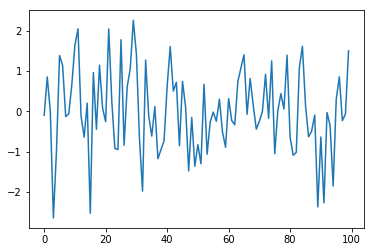

In [38]:
plt.plot(epsilon_values)
plt.show()

# Python Essentials

Reading: https://lectures.quantecon.org/py/python_essentials.html

## User-defined functions

We can create our own **function**:
* Takes arguments and returns an object (a integer, string, plot, another function, etc.)
* Allows you to run similar code without rewriting the entire program

In [39]:
def add_numbers(a, b):
    return a + b

In [40]:
add_numbers(2, 4)

6

In [41]:
def white_noise(mu, sigma, ts_length=100):
    epsilon_values = []               # An empty list
    for i in range(ts_length):
        e = normalvariate(mu, sigma)  # Draw random shock
        epsilon_values.append(e)
    plt.plot(epsilon_values)
    plt.show()

* This function `white_noise` takes three arguments: `mu`, `sigma`, and `ts_length`
* Note that we didn't use `return` - Python will return the last object by default
* `mu` and `sigma` are **positional arguments**
    * Order of arguments is important when calling the function

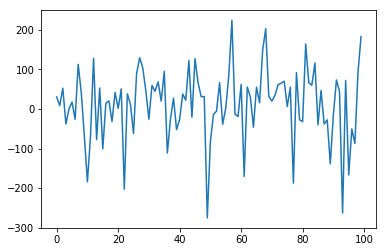

In [42]:
white_noise(0, 100)

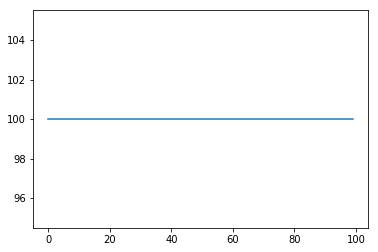

In [43]:
white_noise(100, 0)

In [44]:
white_noise()

TypeError: white_noise() missing 2 required positional arguments: 'mu' and 'sigma'

* `ts_length` is an **keyword argument**
    * It is optional
    * If no value is specified, it takes a default value of 100

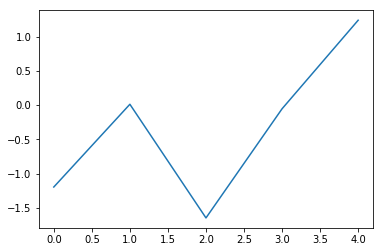

In [45]:
white_noise(0, 1, ts_length=5)

### Exercise

Consider the following autoregressive model (AR(1) model)

$$
y_{t+1} = \mu (1 - \rho) + \rho y_t + \sigma \varepsilon_t \quad \quad \varepsilon_t \sim \mathcal{N}(0, 1)
$$

Where:
* $\mu$ is the unconditional mean
* $\rho$ is the persistence parameter
* $\varepsilon_t$ is an i.i.d random shock
* $\sigma$ is the variance

** Exercise: ** Write a function called `generate_AR1` that takes `mu`, `sigma`, `rho` and `T` as arguments
* `mu`, `sigma`, and `rho` should be positional arguments
* `T` should be a keyword argument with a default value of 100
* Let $y_0 = 10$

The function should **return** a plot of the AR(1) series

Use your function to plot a time series of an AR(1) process where `mu=5`, `sigma=1` and `rho=0.8`

<button data-toggle="collapse" data-target="#sol1" class='btn btn-primary'>Solution</button>
<div id="sol1" class="collapse">
```python
def generate_AR1(mu, sigma, rho, T=100):
    y = []
    y_0 = 10
    y.append(y_0)

    for t in range(T-1):
        e = normalvariate(0, 1)  # Draw random shock
        y_new = mu * (1 - rho) + rho * y[t-1] + sigma * e
        y.append(y_new)

    plt.plot(y)
    plt.show()

generate_AR1(3, 1, 0.8)
```

## Conditional Statements

We can create **if/else statements** in our code, which will tell Python what to execute based on a condition

In [46]:
def greater_than_two(x):
    if x > 2:
        print('x is greater than 2')
    else:
        print('x is less than 2')

In [47]:
greater_than_two(5)

x is greater than 2


In [48]:
greater_than_two(1)

x is less than 2


Let's add a conditional statement to our `white_noise` function

In [49]:
def white_noise(mu, sigma, ts_length=100):
    
    epsilon_values = []   # An empty list
    
    for i in range(ts_length):
        if i < ts_length // 2:            # First half of time series
            e = normalvariate(mu, sigma)
            epsilon_values.append(e)
        else:                             # Second half of time series
            e = normalvariate(mu, 10 * sigma)
            epsilon_values.append(e)
    plt.plot(epsilon_values)
    plt.show()

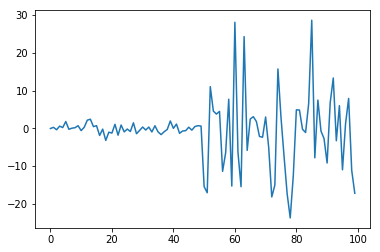

In [50]:
white_noise(0, 1)

## Interactivity in Jupyter notebooks

* The Jupyter notebook interface allows you to create *interactive* functions
* These will be used in a few notebooks during the camp

In [51]:
from ipywidgets import interact

interact(white_noise, mu=0.0, sigma=(0, 10))

A Jupyter Widget

<function __main__.white_noise>

### Exercise

Create an interactive plot using your `generate_AR1` function
* `mu` and `sigma` should take values between 0 and 5
* `rho` should take values between 0 and 0.99, with steps of 0.01

<button data-toggle="collapse" data-target="#sol6" class='btn btn-primary'>Solution</button>
<div id="sol6" class="collapse">
```python
interact(generate_AR1, mu=(0.0, 5), sigma=(0.0, 5), rho=(0, .99, 0.01))
```

## References and Reading

1. https://lectures.quantecon.org/py/getting_started.html
1. https://lectures.quantecon.org/py/python_by_example.html
1. https://lectures.quantecon.org/py/python_essentials.html